In [1]:
from scipy.stats import linregress
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

In [2]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')

In [3]:
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092104998, intercept=1.5287786243363117, rvalue=0.11967005884864078, pvalue=1.3785039162512226e-238, stderr=0.002110976356332331)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


### Multiple regression

In [4]:
gss = pd.read_hdf('gss.hdf5', 'gss')

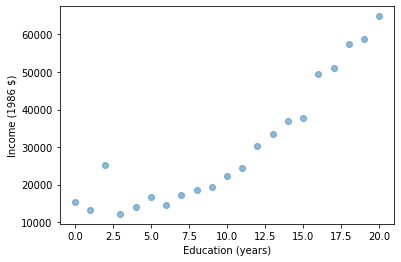

In [5]:
grouped = gss.groupby('educ')

mean_income_by_educ = grouped['realinc'].mean()

plt.plot(mean_income_by_educ,'o', alpha=0.5)
# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

### Multiple regression model

In [6]:
gss['age2'] = gss.age ** 2
gss['educ2'] = gss.educ ** 2

results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


### Predicts for different levels of education, holding age constant.

In [7]:
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


### Visualizing predictions

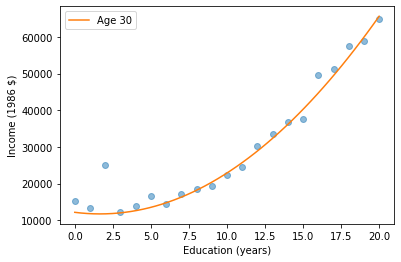

In [8]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ,'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()